# Coding Assignment - 4

#### Authors:
+ Yogananth Mahalingam - ym24 - MCS-DS
+ Qi Zhou - qizhou8 - MCS-DS
+ Derek Zhang - derekz3 - MCS-DS

#### Contributions:
Yoga, Derek & Qi worked on it independently. Brainstormed together & created the final version.

## Part I: Gaussian Mixtures

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from scipy.stats import multivariate_normal

from matplotlib.colors import LogNorm

#from sklearn.model_selection import GridSearchCV
#from sklearn.mixture import GaussianMixture

Text(0, 0.5, 'Duration')

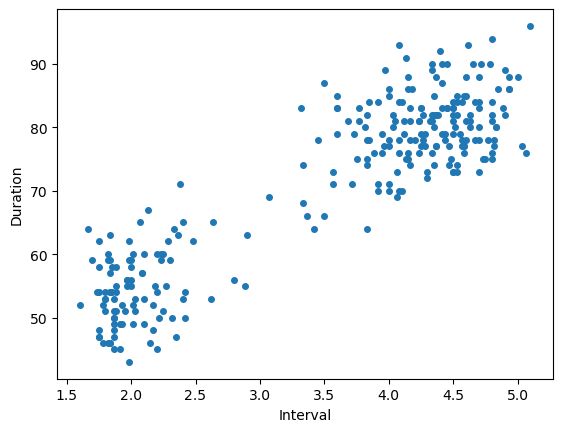

In [2]:
data = pd.read_table("faithful.dat", sep="\s+", index_col=0)
plt.scatter(data['eruptions'], data['waiting'], 16)
plt.xlabel('Interval')
plt.ylabel('Duration')


In [3]:
def myEM(X, G, itmax, prob, mean, sigma):
    loglik_val = None
    prob_new = None
    mean_new = None 
    sigma_new = None

    prob_new = prob
    mean_new = mean 
    sigma_new = sigma
        
    
    for i in range(itmax):
        
        Z = Estep(X=X, G=G, prob=prob_new, mean=mean_new, sigma=sigma_new)
        (prob_new, mean_new, sigma_new) = Mstep(X=X, G=G, prob=prob_new, mean=mean_new, sigma=sigma_new, Z=Z)
        loglik_val = loglik(X=X, G=G, prob=prob_new, mean=mean_new, sigma=sigma_new)
        """
        #print(X)
        print("myEM:Loop")
        print("------")
        print(f"prob_new={prob_new}")
        print(f"mean_new={mean_new}")
        print(f"sigma_new={sigma_new}")
        print(f"loglik={loglik_val}")
        print("------")
        """
        
    return (prob_new, mean_new, sigma_new, loglik_val)



In [4]:
def Estep(X, G, prob, mean, sigma):
    n, d = X.shape
    p = np.zeros([G, X.shape[0]])
    
    eq1 = prob[:, np.newaxis]
    
    sigma_det = np.linalg.det(sigma)
    
    A = X.T
    A_minus_mean = (A[np.newaxis, :, :] - mean[:, :, np.newaxis])
    eq3 = (np.linalg.inv(sigma) @ A_minus_mean) * A_minus_mean
    eq3 = -0.5 * np.sum(eq3, axis=1)
    eq3 = np.exp(eq3) / np.sqrt( ((2 * np.pi)** d)  * sigma_det )
    
    p = eq1 * eq3
    
    p = p / np.sum(p, axis=0)
    return p
    


In [5]:
def Mstep(X, G, prob, mean, sigma, Z):
    n = X.shape[0]
    prob_new = None
    mean_new = None
    sigma_new = None
    
    prob_new = np.mean(Z, axis=1)
    
    mean_new = np.sum(Z[:, :, np.newaxis] * X, axis = 1) / np.sum(Z[:, :, np.newaxis], axis = 1)
    
    sigma_new = sigma
    
    a1 = (X[np.newaxis, :, :] - mean_new[:, np.newaxis, :]) 
    a2 = (X.T[np.newaxis, :, :] - mean_new[:, :, np.newaxis] )* Z[:,np.newaxis,:]
    m1 = np.matmul(a2, a1)
    sigma_new = np.sum(m1, axis=0) / n
    
    return (prob_new, mean_new, sigma_new)



In [6]:
def loglik(X, G, prob, mean, sigma):
    n, d = X.shape
    p = np.zeros([G, X.shape[0]])
    
    eq1 = prob[:, np.newaxis]
    
    sigma_det = np.linalg.det(sigma)
    
    A = X.T
    A_minus_mean = (A[np.newaxis, :, :] - mean[:, :, np.newaxis])
    eq3 = (np.linalg.inv(sigma) @ A_minus_mean) * A_minus_mean
    eq3 = -0.5 * np.sum(eq3, axis=1)
    eq3 = np.exp(eq3) / np.sqrt( ((2 * np.pi)**d) * sigma_det)
    
    p = eq1 * eq3
    
    #print(f"loglik:p={p.T}")
    
    loglik_val = np.sum(np.log(np.sum(p, axis=0)))
    
    return loglik_val


In [7]:
def init_param(X, G, data_split_count):
    n, d = X.shape
    
    
    last_count = n-np.sum(data_split_count)
    data_split_count = np.append(data_split_count, last_count)
    data_split_count = data_split_count.astype(int)
    
    p = np.array(data_split_count)
    p = p / n
    #print(f"p={p}")
    
    #print(f"data_split_count={data_split_count}")
    
    Z = np.repeat(np.arange(G), data_split_count)
    #print(Z)
    mask = np.arange(G) [..., np.newaxis] == Z[np.newaxis, ...]
    #print(mask)
    
    X_tmp = X[np.newaxis, :, :] * mask[:, :, np.newaxis]
    mean = np.sum(X_tmp, axis=1)
    mean = mean / data_split_count[..., np.newaxis]
    #print(f"mean={mean}")
    
    sigma = mean
    
    a1 = (X[np.newaxis, :, :] - mean[:, np.newaxis, :]) * mask[:, :, np.newaxis]
    a2 = (X.T[np.newaxis, :, :] - mean[:, :, np.newaxis] ) * mask[:, np.newaxis, :]
    m1 = np.matmul(a2, a1)
    sigma = np.sum(m1, axis=0) / n
    
    return (p, mean, sigma)



## Testing

#### Two component mixture

In [14]:
G=2
data_split_count=np.array([10])

(prob, mean, sigma) = init_param(X=data.to_numpy(), G=G, data_split_count=data_split_count)
#(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=700, prob=prob, mean=mean, sigma=sigma)
(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=20, prob=prob, mean=mean, sigma=sigma)

print(f"prob")
print(f"{prob}")
print(f"mean")
print(f"{mean.T}")
print(f"sigma")
print(f"{sigma}")
print(f"loglik")
print(f"{loglik_val}")

prob
[0.04297883 0.95702117]
mean
[[ 3.49564188  3.48743016]
 [76.79789154 70.63205853]]
sigma
[[  1.29793612  13.92433626]
 [ 13.92433626 182.58009247]]
loglik
-1289.5693549424104


#### Three component mixture

In [15]:
G=3
data_split_count=np.array([10, 20])

(prob, mean, sigma) = init_param(X=data.to_numpy(), G=G, data_split_count=data_split_count)
#(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=200, prob=prob, mean=mean, sigma=sigma)
(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=20, prob=prob, mean=mean, sigma=sigma)

print(f"prob")
print(f"{prob}")
print(f"mean")
print(f"{mean.T}")
print(f"sigma")
print(f"{sigma}")
print(f"loglik")
print(f"{loglik_val}")

prob
[0.04363422 0.07718656 0.87917922]
mean
[[ 3.51006918  2.81616674  3.54564083]
 [77.10563811 63.35752634 71.25084801]]
sigma
[[  1.26015772  13.51153756]
 [ 13.51153756 177.96419105]]
loglik
-1289.350958862739


In [48]:
G=2
data_split_count=np.array([10])


prob_1 = np.random.rand()
prob_1 = 0.05
prob = np.array([prob_1, 1-prob_1])
#prob = np.array([0.04297883, 0.95702117])

mean = np.array([[0, 0], [10, 100]])
#mean = np.array([[3.49564188, 76.79789154],[ 3.48743016, 70.63205853]])

sigma = np.array([[1, 10], [5, 180]])
#sigma=np.array([[  1.29793612,  13.92433626], [ 13.92433626, 182.58009247]])

#(prob, mean, sigma) = init_param(X=data.to_numpy(), G=G, data_split_count=data_split_count)
(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=1000, prob=prob, mean=mean, sigma=sigma)
#(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=20, prob=prob, mean=mean, sigma=sigma)

print(f"prob={prob}")
print(f"mean={mean}")
print(f"sigma={sigma}")
print(f"loglik={loglik_val}")

prob=[0.35924785 0.64075215]
mean=[[ 2.04619509 54.59651386]
 [ 4.29603225 80.0362177 ]]
sigma=[[ 0.1327766   0.75151708]
 [ 0.75151708 35.17054472]]
loglik=-1140.186759437082


In [49]:
G=2
data_split_count=np.array([10])

(prob, mean, sigma) = init_param(X=data.to_numpy(), G=G, data_split_count=data_split_count)
(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=1, prob=prob, mean=mean, sigma=sigma)
#(prob, mean, sigma, loglik_val) = myEM(X=data.to_numpy(), G=G, itmax=20, prob=prob, mean=mean, sigma=sigma)

print(f"prob={prob}")
print(f"mean={mean}")
print(f"sigma={sigma}")
print(f"loglik={loglik_val}")

prob=[0.03685524 0.96314476]
mean=[[ 3.31211483 71.98706055]
 [ 3.49450513 70.85534934]]
sigma=[[  1.29675804  13.93374588]
 [ 13.93374588 184.09835147]]
loglik=-1289.7659495557784
